# STATS 507

Let us practice applying the following concepts:
* using `zip` function
* using `map` and `reduce` functions
* working with files

### List comprehension exercise

Use a list comprehension to collect a list of lengths of the words and the word itself as a tuple
```
fruits = ['orange', 'mango', 'banana', 'apple', 'strawberry']

```


In [ ]:
fruits = ['orange', 'mango', 'banana', 'apple', 'strawberry']
fruit_lengths = [(len(fruit), fruit) for fruit in fruits]

In [ ]:
fruit_lengths == [(6, 'orange'), (5, 'mango'), (6, 'banana'), (5, 'apple'), (10, 'strawberry')]

True

### use `map` to get the same result

In [ ]:
def my_function(x):
  return (len(x), x)
fruit_lenghts = list(map(my_function, fruits ))
fruit_lengths

[(6, 'orange'), (5, 'mango'), (6, 'banana'), (5, 'apple'), (10, 'strawberry')]

## Examples of using `reduce`

* Product of Elements in a List:
Write a function that uses reduce to find the product of elements in a list.



In [ ]:
# using lambda
from functools import reduce
numbers = [2, 5, 7]

reduce(lambda x,y: x * y, numbers)

70

### Example of a sparse vector

A sparse vector is a vector in which most of the elements are zero or some default value. In contrast, a dense vector is one where most of the elements have non-zero values.

Sparse vectors are common in various applications, including natural language processing, machine learning, and scientific computing, where they can significantly reduce memory usage and computation time when handling large datasets.

A dictionary to store only the non-zero elements is often used to represent sparse vectors for efficiency. The key is the index position and the value is the value of the vector element

Write a function that compares two sparse vectors represented as dictionaries to determine if they are equal.

In [ ]:
# long form that can be simplified
def sparse_vector_equal(d1, d2):
  return d1.keys() == d2.keys() and all([d1[k] == d2.get(k) for k in d1])


In [34]:
# Refer: https://docs.python.org/2/library/stdtypes.html#mapping-types-dict
# simplified
def sparse_vector_equal(d1, d2):
  return d1 == d2

# But this one will fail for entries that have '0' value

In [42]:
d1 = {1:10, 2:100}
d2 = {1:10, 2:100}
d3 = {3:10, 4:100}
d4 = {1:10, 2:100, 3:300}

sparse_vector1 = {0: 2, 1: 0, 2: 5, 3: 0, 4: 1}
sparse_vector2 = {5: 0, 0: 2,  4: 1, 1: 0, 2: 5, 3: 0}

assert sparse_vector_equal(d1, d2)
assert sparse_vector_equal(d1, d3) == False
assert sparse_vector_equal(d1, d4) == False
assert sparse_vector_equal(sparse_vector1, sparse_vector2)

{(2, 100), (1, 10)} {(2, 100), (1, 10)}
{(2, 100), (1, 10)} {(4, 100), (3, 10)}
{(2, 100), (1, 10)} {(2, 100), (1, 10), (3, 300)}
{(0, 2), (2, 5), (4, 1)} {(0, 2), (2, 5), (4, 1)}


In [41]:
def sparse_vector_equal(vector1, vector2):
    # Filter out the non-zero values from the dictionaries and then compare
    non_zero_elements_1 = set(filter(lambda item: item[1] != 0, vector1.items()))
    non_zero_elements_2 = set(filter(lambda item: item[1] != 0, vector2.items()))
    print(non_zero_elements_1, non_zero_elements_2)
    return non_zero_elements_1 == non_zero_elements_2


# `str` methods examples


In [43]:
import string
print(string.ascii_letters)
print(string.ascii_lowercase)


abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
abcdefghijklmnopqrstuvwxyz


## Using `maketrans` and `translate` simple example

In [47]:
d = {'a':'c', 'b':'a', 'c':'z'}
t1 = str.maketrans(d)
print(type(t1))
'abc'.translate(t1)


<class 'dict'>


'caz'

In [ ]:
t2 = str.maketrans('abc', 'xyz')
'cab'.translate(t2)

'zxy'

In [ ]:
string.ascii_lowercase[10:] + string.ascii_lowercase[:10]

'klmnopqrstuvwxyzabcdefghij'

### using `join` method of string

Join all the words to form one word without using a loop

In [48]:
fruits = ['orange', 'mango', 'banana', 'apple', 'strawberry']
"".join(fruits)

'orangemangobananaapplestrawberry'

## More `itertools` example

In [50]:
import itertools as it
x = it.count(0)
next(x)

0

In [56]:
next(x)

6

In [57]:
d = it.repeat('b', 3)
d

repeat('b', 3)

In [ ]:
"".join(d)

'bbb'

In [ ]:
# flattening multiple iterables
from_iterable = it.chain.from_iterable(['umich',
                                     'stats',
                                     [5,0,7]])

# flattened iterable
list(from_iterable)

['u', 'm', 'i', 'c', 'h', 's', 't', 'a', 't', 's', 5, 0, 7]

### Using default dictionary

In [64]:
import collections
default_d = collections.defaultdict(lambda: 'No element')
print(default_d)
default_d['a']

defaultdict(<function <lambda> at 0x7a81891c7b50>, {})


'No element'

In [62]:
d_1 = {1: 'a'}
d_1[1] = 'b'

d_1[2]

KeyError: 2

### examples using `max` function

In [30]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [31]:
print(max(1, 10, 14, 4))
print(max([1, 10, 14, 4]))
print(max([(1, 'a'), (5, 'c'), (5, 'z'), (5, 'a')]))

d1 = {'a': 10, 'b' : 20, 'c': 5}
max(d1, key = d1.get)

14
14
(5, 'z')


'b'

## Using other the built-in libraries
Python has an extremely well developed collection of libraries built in. Often times, if you are doing something that seems rather simple and routine, chances are good that there is a built-in method or class that does it for you.

In [ ]:
from collections import Counter

help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Counter(iterable=None, /, **kwds)
 |  
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                

In [ ]:
def mode(x):
    "returns a mode of numerical sequence x"
    return tuple([Counter(x).most_common(2)])
mode([1, 1, 1, 2, 2, 2, 3, 4])

([(1, 3), (2, 3)],)

# Harry Potter
The file `hp1.txt` contains the full text to book one of Harry Potter:

In [65]:
hp1 = list(open("hp1.txt", "rt"))
hp1[:10]

["Harry Potter and the Sorcerer's Stone\n",
 '\n',
 '\n',
 'CHAPTER ONE\n',
 '\n',
 'THE BOY WHO LIVED\n',
 '\n',
 'Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\n',
 'that they were perfectly normal, thank you very much. They were the last\n',
 "people you'd expect to be involved in anything strange or mysterious,\n"]

In [66]:
all_words = [word for line in hp1 for word in line.strip().split(" ") if word]

In [67]:
from collections import Counter
c = Counter(all_words)

### find the 10 words that occur the most

In [68]:
c.most_common(10)

[('the', 3306),
 ('to', 1827),
 ('and', 1787),
 ('a', 1577),
 ('of', 1235),
 ('was', 1148),
 ('he', 1018),
 ('Harry', 903),
 ('in', 898),
 ('his', 893)]

## Stopwords
The top ten most common words are mostly uninteresting -- with the exception of "Harry" they are simply the most common words in the English language. It would be better to study the most common words that are specific to this particular novel. In order to do that, we will utilize a list of so-called "stopwords" which occur most common in English.

In [69]:
stopwords = [line.strip() for line in open("stopwords.txt", "rt")]

In [71]:
stopwords = set(stopwords)

In [72]:
type(stopwords)

set

### remove all the stop words from all_words. E.g., of stop words include
* articles; 'the', 'a' ...
* connectives; 'and', 'or' ...
* prepositions; 'in', 'at' ...

In [73]:
uncommon_words = [word for word in all_words if word not in stopwords]

In [74]:
Counter(uncommon_words).most_common(10)

[('Harry', 903),
 ('--', 688),
 ('said', 659),
 ('I', 499),
 ('He', 468),
 ('The', 260),
 ('Ron', 249),
 ('back', 210),
 ('Hagrid', 196),
 ('It', 195)]

## Find the most common 20 proper names that are at least 5 characters long
* you can assume that a proper name starts with an upper case letter

In [ ]:
import string
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [75]:
def clean_up(x):
  if len(x) < 5:
    return False
  if x[0] not in string.ascii_uppercase:
    return False
  return True
uncommon_words = list(filter(clean_up, uncommon_words))

In [76]:
Counter(
   uncommon_words
).most_common(20)

[('Harry', 903),
 ('Hagrid', 196),
 ('Hermione', 175),
 ('Professor', 161),
 ('Harry,', 134),
 ('Harry.', 115),
 ('Uncle', 111),
 ("Harry's", 107),
 ('Snape', 106),
 ('Dudley', 95),
 ('Dumbledore', 82),
 ('Vernon', 72),
 ('Quirrell', 68),
 ('McGonagall', 66),
 ('Hagrid,', 65),
 ('Malfoy', 63),
 ('There', 61),
 ('Gryffindor', 60),
 ('Neville', 53),
 ('Quidditch', 47)]

What other issues do you see in the words? Hint: Harry count is twice..
continue fixing your function to clean up more

In [77]:
filtered_words = [word.replace("'s", ""). replace(",", "").replace(".", "") for word in uncommon_words]

In [78]:
Counter(
   filtered_words
).most_common(20)

[('Harry', 1264),
 ('Hagrid', 333),
 ('Hermione', 254),
 ('Professor', 165),
 ('Snape', 150),
 ('Dumbledore', 138),
 ('Dudley', 132),
 ('Uncle', 111),
 ('Vernon', 108),
 ('Malfoy', 106),
 ('Neville', 105),
 ('Quirrell', 102),
 ('McGonagall', 97),
 ('Gryffindor', 75),
 ('There', 69),
 ('Potter', 68),
 ('Petunia', 56),
 ('Hogwarts', 56),
 ('Quidditch', 53),
 ('Dursley', 52)]

## Sentiment scores
A good story follows an arc.

In [84]:
sentiments = [
    {
        line.strip()
        for line in open(f"{sent}-words.txt", "rt")
        if line.strip() and not line.startswith(";")
    }
    for sent in ["positive", "negative"]
]

In [ ]:
len(sentiments)

2

In [ ]:
print(type(sentiments), type(sentiments[0]))

<class 'list'> <class 'set'>


In [79]:
chapters = []
for line in hp1[3:]:
    if line.startswith("CHAPTER"):
        current_chapter = []
        chapters.append(current_chapter)
    else:
        current_chapter.append(line.strip())

In [82]:
chapter_words = [sum([line.split(" ") for line in chapter if line], []) for chapter in chapters]

In [ ]:
list(it.chain.from_iterable([['abc', 'xyz'], ['aaa', 'bbbb']]))

['abc', 'xyz', 'aaa', 'bbbb']

In [ ]:
sum([['abc', 'xyz'], ['aaa', 'bbbb']], [])

['abc', 'xyz', 'aaa', 'bbbb']

In [ ]:
print(chapter_words[0])

['THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley,', 'of', 'number', 'four,', 'Privet', 'Drive,', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal,', 'thank', 'you', 'very', 'much.', 'They', 'were', 'the', 'last', 'people', "you'd", 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious,', 'because', 'they', 'just', "didn't", 'hold', 'with', 'such', 'nonsense.', 'Mr.', 'Dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'Grunnings,', 'which', 'made', 'drills.', 'He', 'was', 'a', 'big,', 'beefy', 'man', 'with', 'hardly', 'any', 'neck,', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache.', 'Mrs.', 'Dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck,', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'spent', 'so', 'much', 'of', 'her', 'time', 'craning', 'over', 'garden', 'fences,', 'spying', 'on', 'the', 'neighbors.', 'The', 'Durs

In [85]:
def normalize_word(word):
    return word.replace(".", "").replace(",", "").replace("'s", "").lower()


chapter_scores = [
    [sum(1 for word in chap if normalize_word(word) in s) for s in sentiments]
    for chap in chapter_words
]

In [ ]:
chapter_scores

[[100, 124],
 [72, 116],
 [65, 97],
 [97, 128],
 [177, 145],
 [128, 113],
 [125, 105],
 [70, 89],
 [94, 144],
 [93, 118],
 [69, 90],
 [126, 135],
 [77, 70],
 [67, 83],
 [105, 198],
 [122, 186],
 [142, 193]]

In [ ]:
positives, negatives = zip(*chapter_scores)
overall_sentiment = (sum(positives) - sum(negatives)) / (
    sum(positives) + sum(negatives)
)

In [ ]:
overall_sentiment

-0.10484079730779187

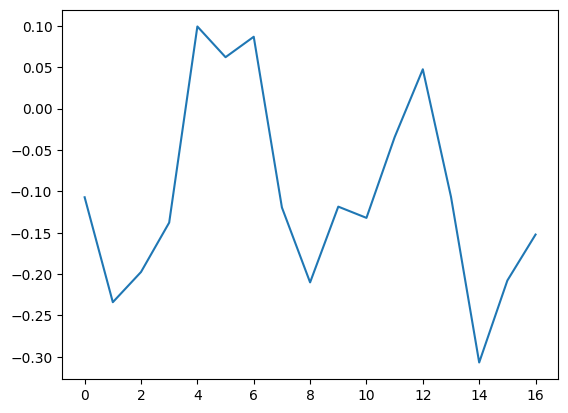

In [ ]:
import matplotlib.pyplot as plt

plt.plot([(x - y) / (x + y) for x, y in chapter_scores])